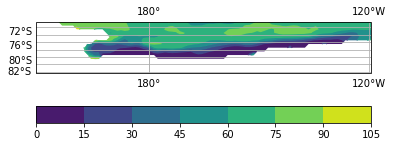

55.46634762856081


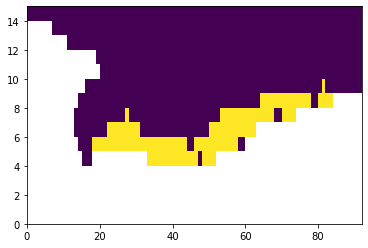

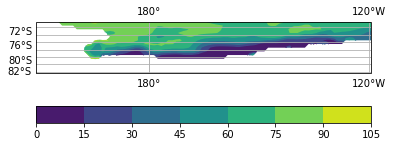

59.39160849213226


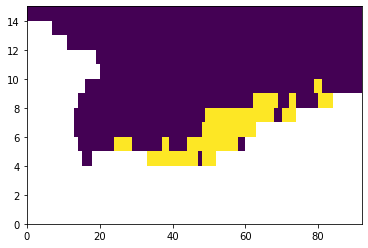

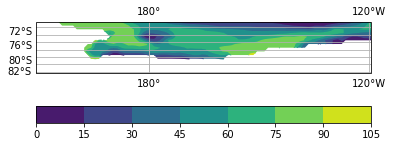

52.52586288081233


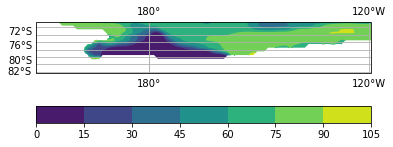

60.42239057293599


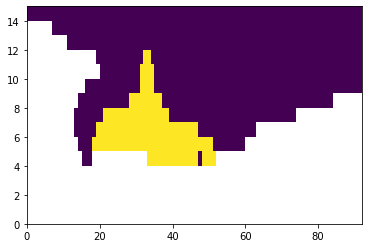

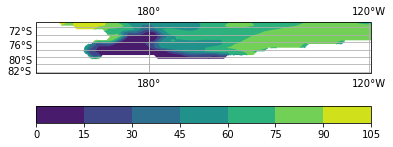

62.35929112568498


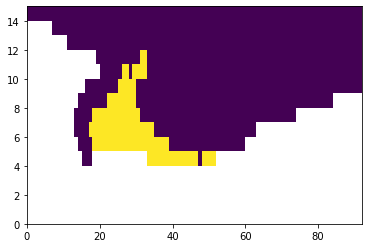

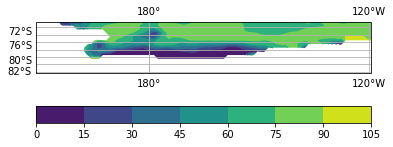

62.33347352388037


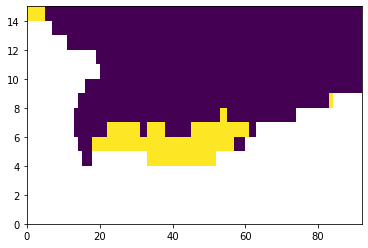

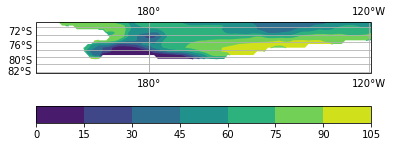

62.238020614651234


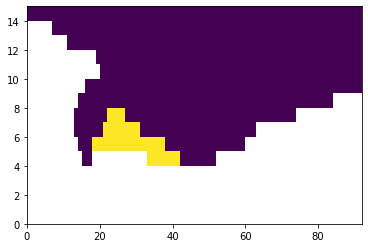

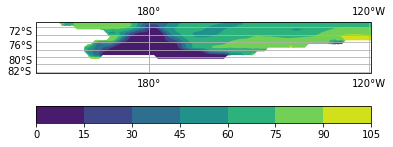

56.589296129433244


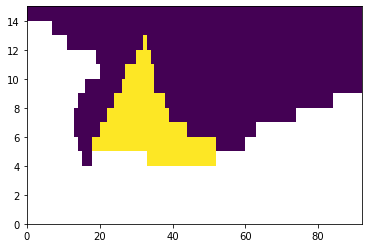

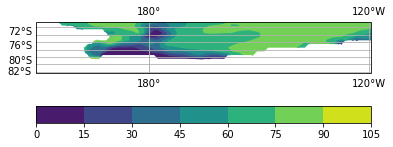

64.47748626120848


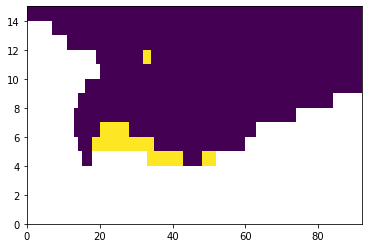

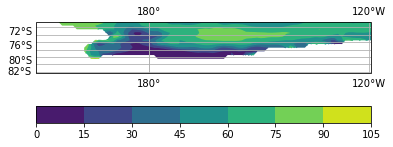

54.38058262781921


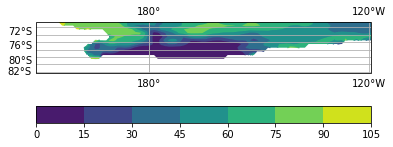

48.403954408937295


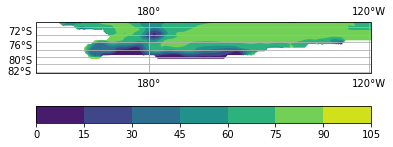

66.63286013875316


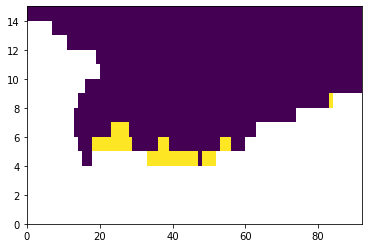

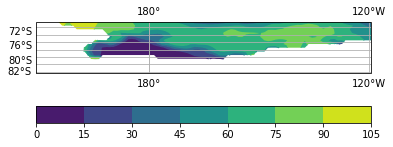

58.610100649236614


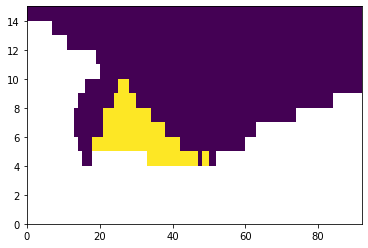

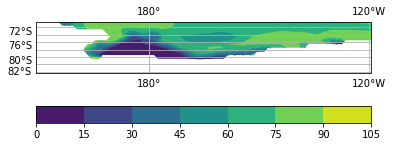

61.81246711222142


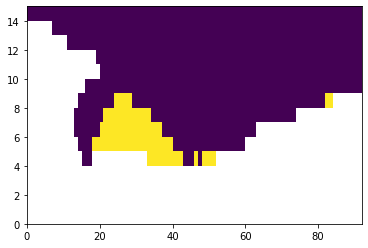

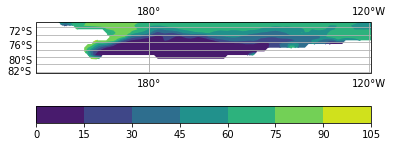

44.08721144298407


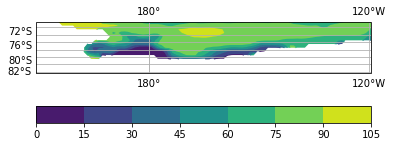

71.14843255400172


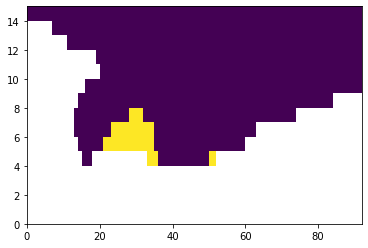

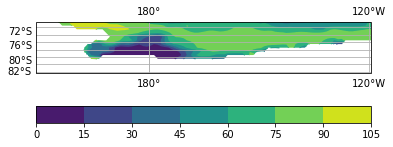

66.12493827495403


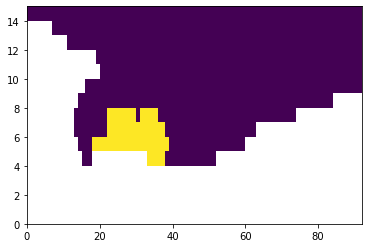

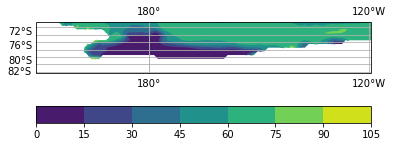

50.558539239759526


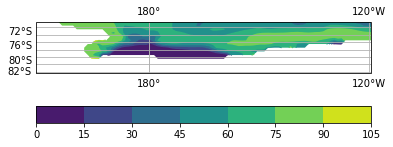

58.09436243220727


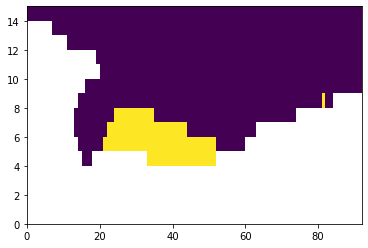

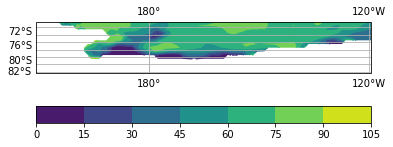

60.75400939419978


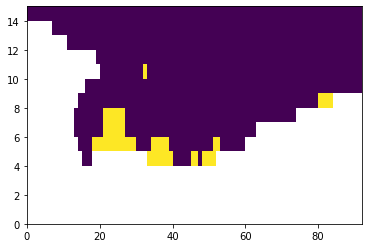

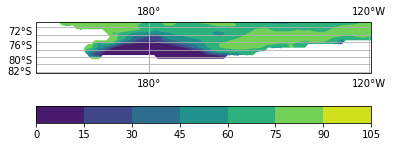

61.92035112426618


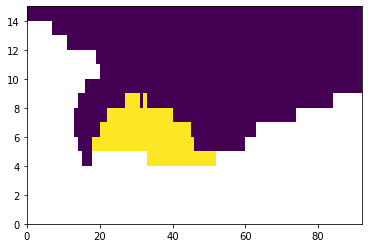

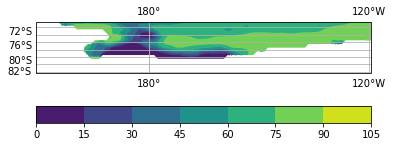

62.27100137405937


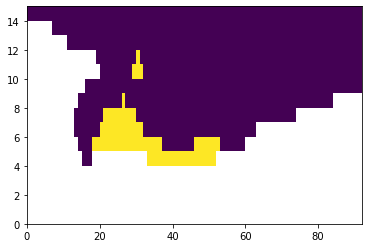

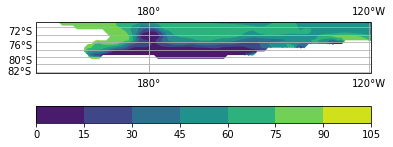

50.78112238149872


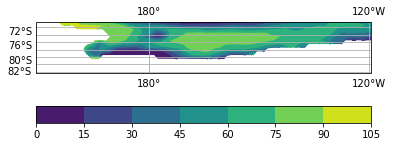

56.07999663387491


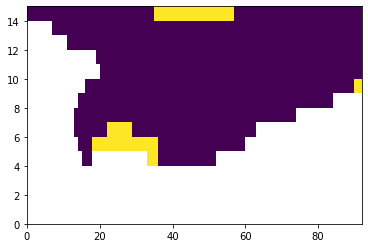

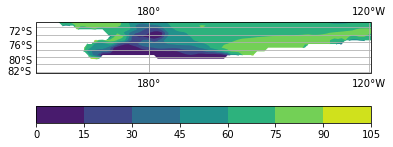

59.65355562782569


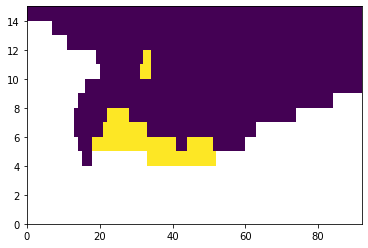

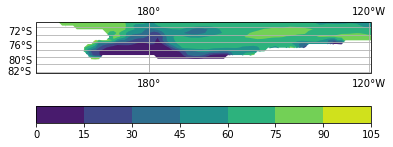

58.13814052064841


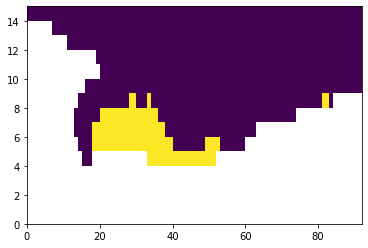

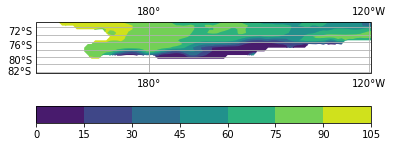

63.6335869383867


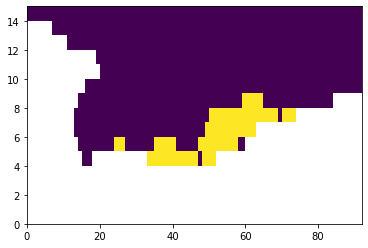

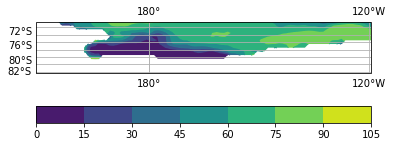

55.73497759976835


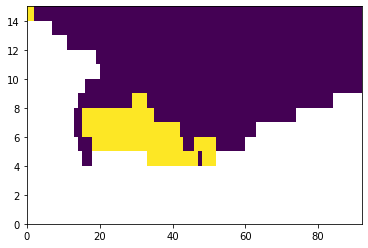

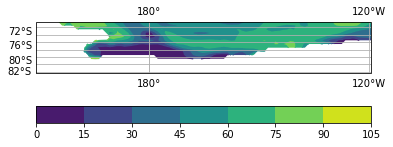

51.10889815164254


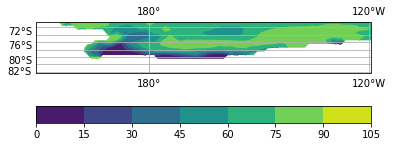

65.08147232699814


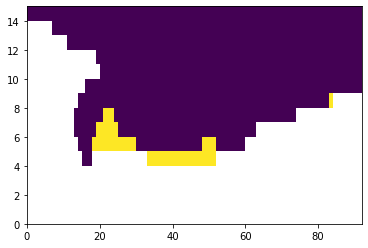

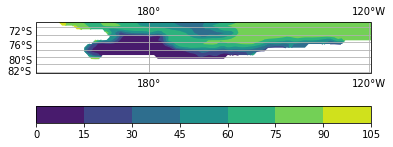

56.316333317518605


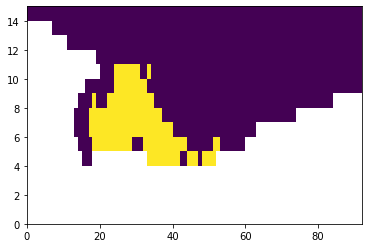

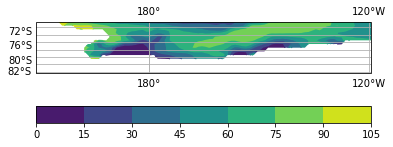

56.9485693606442


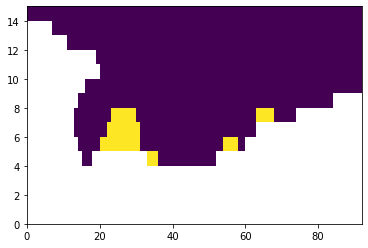

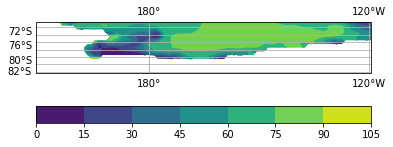

64.43609434771318


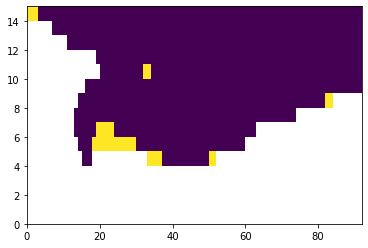

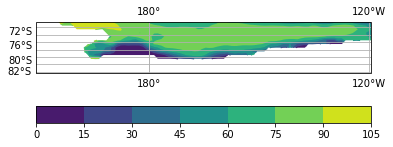

68.21569048645159


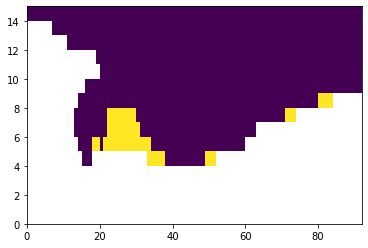

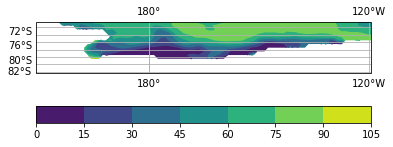

56.02841429793597


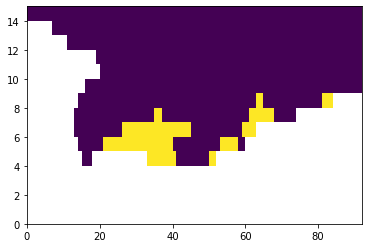

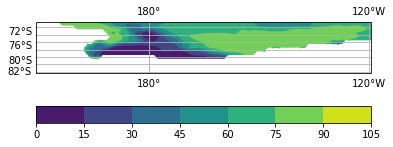

60.73025592357677


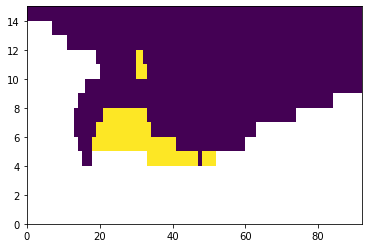

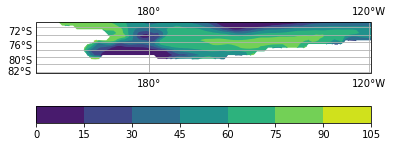

50.945977599706644


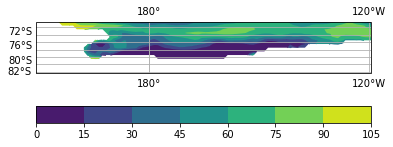

49.36870413443609


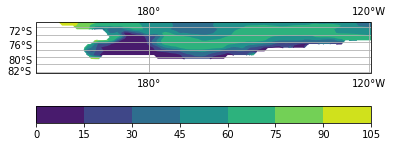

48.683855446125285


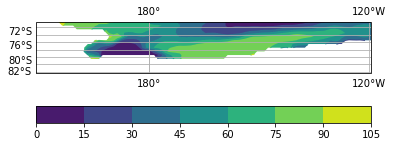

51.99185680608995


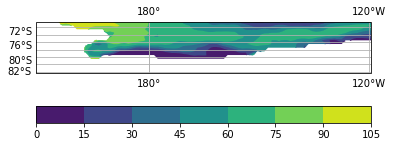

53.0713460282721


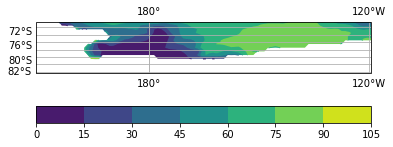

54.69410706465555


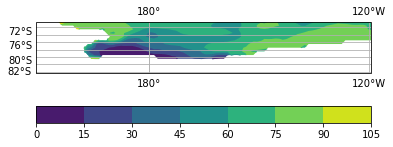

63.40673132899212


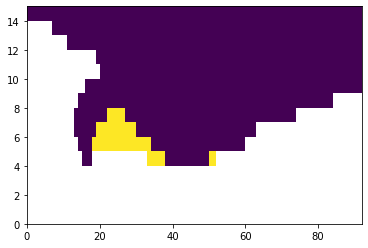

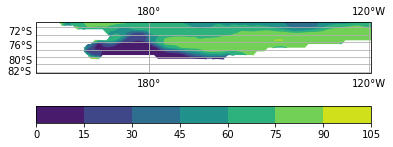

61.88329538027219


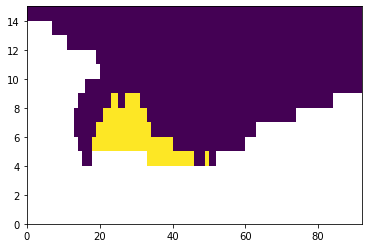

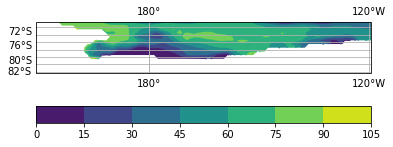

55.11262494219711


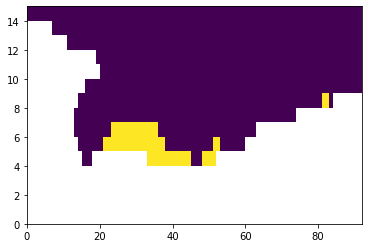

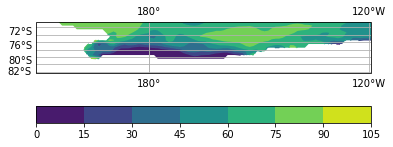

59.73695675874399


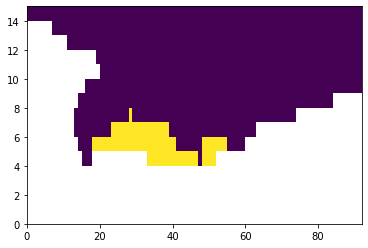

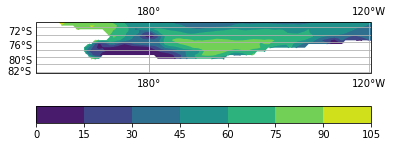

53.802138112887604


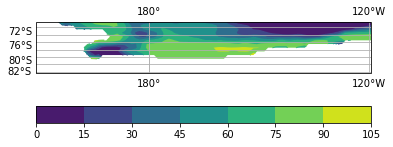

47.957015568434414


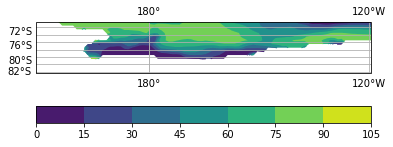

55.98005826470931


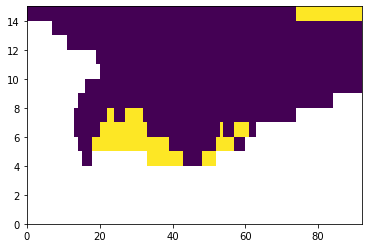

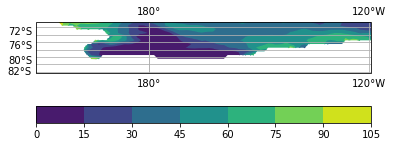

37.053914744679204


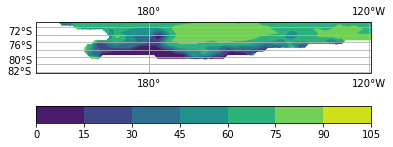

60.011058909915356


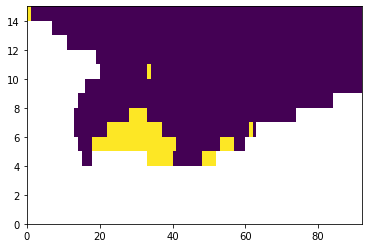

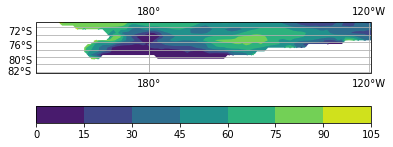

48.206878032895254


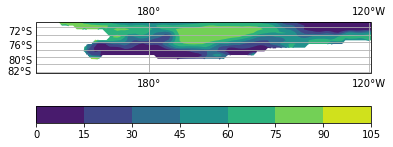

45.58533331384464


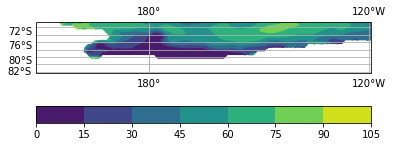

46.95440154230828


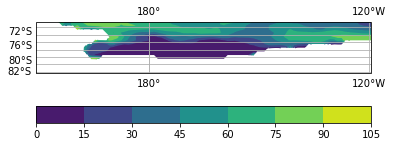

41.4626956822069


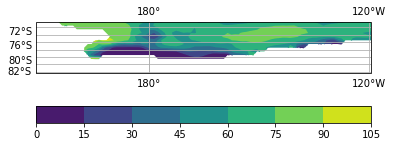

59.79311065513113


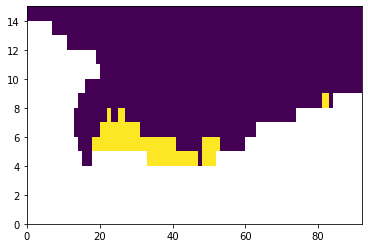

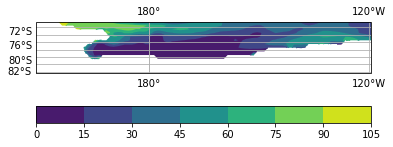

34.95317327763113


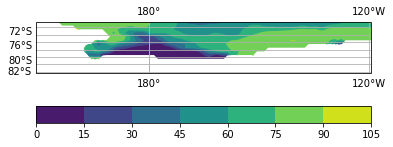

61.58609817336845


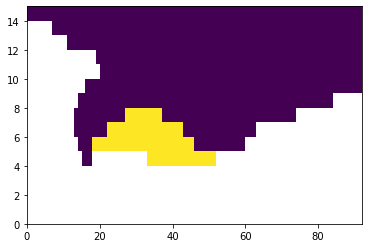

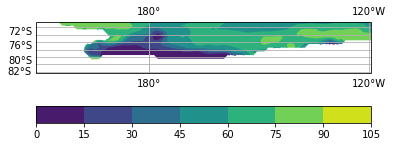

56.2926329827299


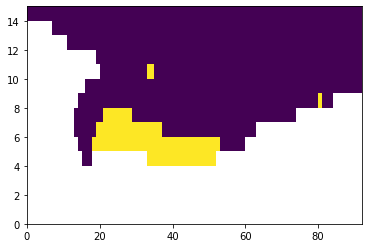

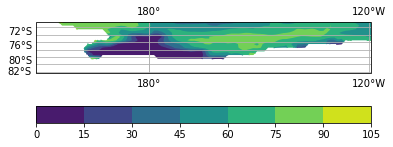

55.75177697002233


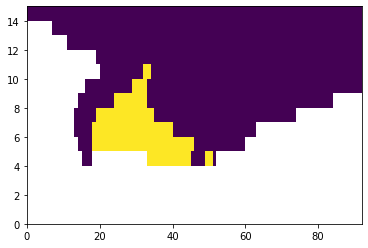

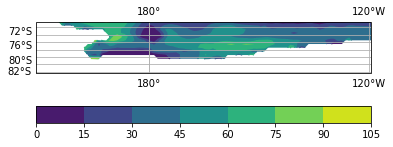

39.19162483916609


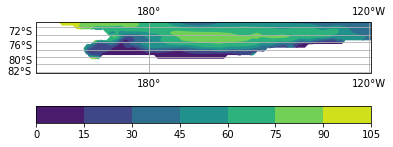

52.79365521136163


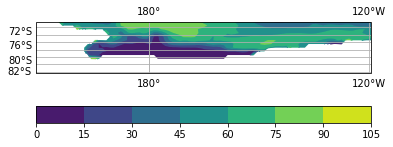

49.57509126142599


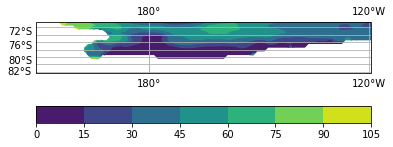

36.73092402679618


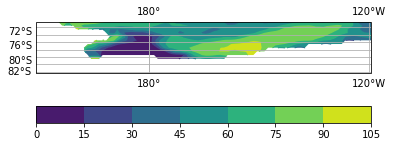

57.454042181531776


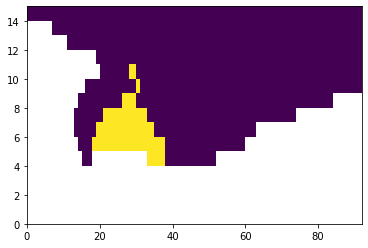

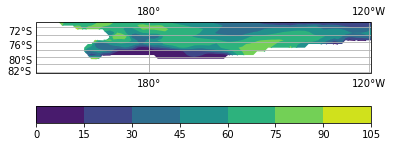

50.119401916041475


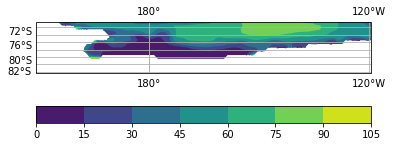

44.86013821760042


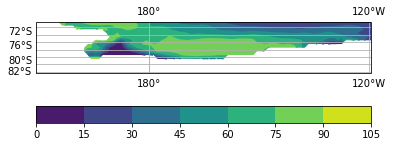

55.23405671686749


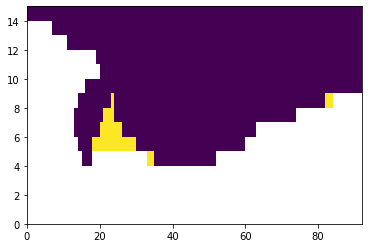

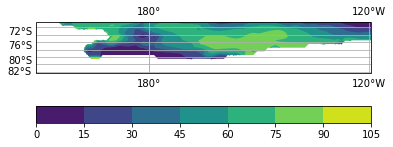

51.366969465947165


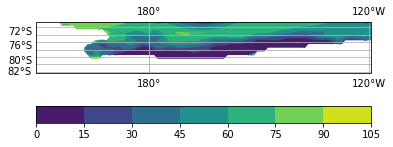

46.04941437171105


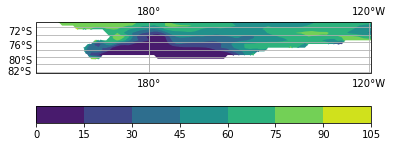

51.19002449743685


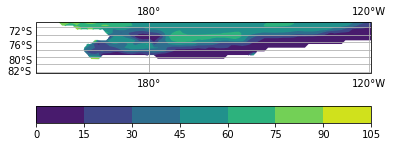

38.78493002808875


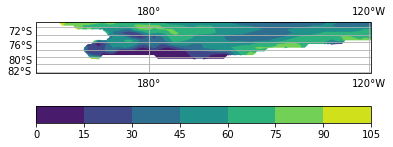

50.63832413099863


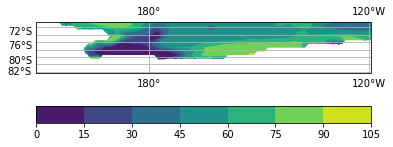

53.439497639579606


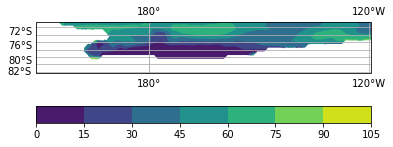

41.13584271394359


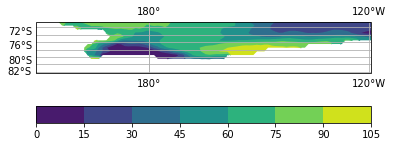

55.3441866745676


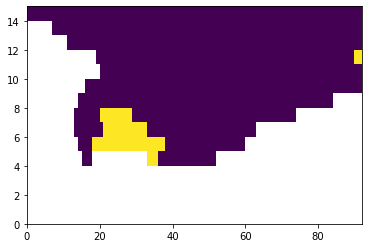

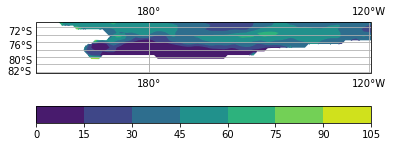

35.99197199074962


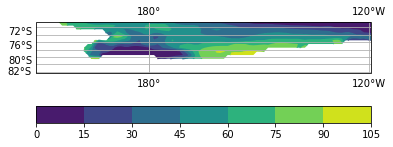

44.40641285343127


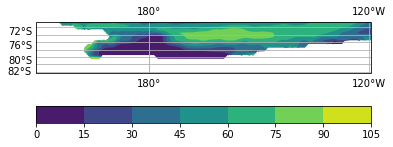

47.55012854296307


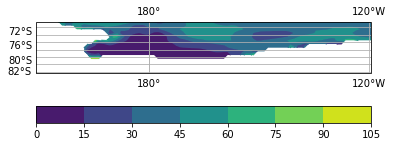

33.661425336328925


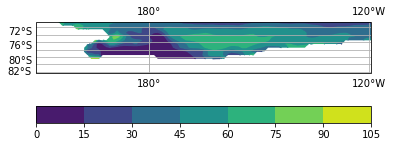

40.29430601583308


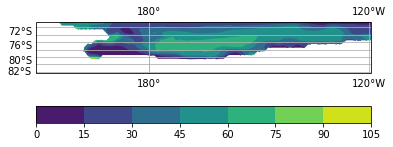

37.90825128692589


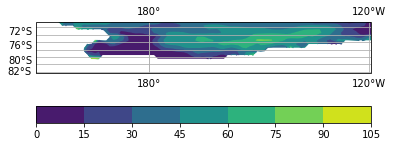

37.323694135909555


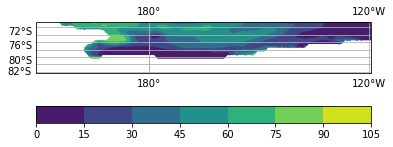

34.88287678464894


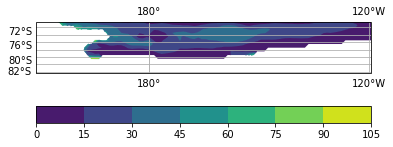

20.197319385058098


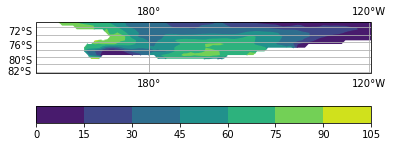

41.91897175444234


In [74]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import iris.analysis.cartography
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import matplotlib.ticker as mticker 
from numpy import *
from matplotlib.pyplot import *
from iris.analysis import *
from iris.coord_categorisation import * 
from iris.analysis.cartography import * 
from scipy.stats import *
from scipy.stats.mstats import *
from iris import *

import warnings
warnings.filterwarnings("ignore")

fname = '/Users/alicebrindley/OneDrive - University of Exeter/siconc_SImon_GFDL-CM4_ssp585_r1i1p1f1_gr_201501-210012.nc'
cube = iris.load(fname)

siconc=cube[2] 
add_month_number(siconc, 'time', name='month_number2')
cube2 = siconc[np.where((siconc.coord('month_number2').points == 12))]
#then to average this by each year, so that you have the December-Jan for
add_season_year(cube2, 'time', name='season_year')
#then average by the season year:
cube2.aggregated_by(['season_year'], iris.analysis.MEAN)

fgname = ('/Users/alicebrindley/Dropbox/YEAR_3/Dissertation/fgco2_files/fgco2_picontrol/outfile')
fgcube = iris.load(fgname)
fgcube1=fgcube[2] 

#extract Jan and Dec to average the sea ice concentration across these mon
add_month_number(fgcube1, 'time', name='month_number1')
fgcube2 = fgcube1[np.where((fgcube1.coord('month_number1').points == 12))]
#then to average this by each year, so that you have the December-Jan for
add_season_year(fgcube2, 'time', name='season_year')
#then average by the season year:
fgcube2.aggregated_by(['season_year'], iris.analysis.MEAN)
#cube2 is therefore the data per season


# Extract the regionan of interst across teh whole cube just once at that start
west = -210 
east = -120 
south = -82 
north = -69

temporary_cube = cube2.intersection(longitude = (west, east)) 
cube2 = temporary_cube.intersection(latitude = (south, north))

fg_temporary_cube = fgcube2.intersection(longitude = (west, east)) 
fgcube2 = fg_temporary_cube.intersection(latitude = (south, north))


#Make a 3D copy of the input cube to hold teh output
polynya_location_cube = cube2.copy()
#have a variable holding just the data from this into which we can push teh processed data
polynya_location_cube_data = polynya_location_cube.data
#not just set that all to missing data (nans) so that we know if we have data in it it is real data we want not just leftovers.
polynya_location_cube_data[:] = np.nan

#start of the loop
for i in range (0,2101-2015):
    regional_cube=cube2[i,:,:]
    ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0)))
    my_plot = iplt.contourf(regional_cube)
    plt.gca().gridlines(draw_labels=True)
    plt.colorbar(orientation='horizontal')
    plt.show()

    #this is not needed now because it is not used in this part of the script.
    # fg_regional_cube = fgcube2[i,:,:]
    # ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0)))
    # my_plot = iplt.contourf(fg_regional_cube)
    # plt.gca().gridlines(draw_labels=True)
    # #print(fgcube3.coord('time'))
    # #plt.show()

#extract the latitude I want to work with
    #north_edge = regional_cube.collapsed('latitude', iris.analysis.MEAN)
    #average across this latitude
    #nE_mean = north_edge.collapsed('longitude', iris.analysis.MEAN)
    #print(nE_mean.data)
    latitude = -72,-72.5,-73,-73.5,-74,-74.5,-75
    grid_areas = area_weights(regional_cube)
    average_variable = regional_cube.collapsed(['latitude', 'longitude'],MEAN,weights=grid_areas)
    print(average_variable.data)
    
    #north_edge = regional_cube.extract(iris.Constraint(latitude=[-72,-72.5,-73,-73.5,-74,-74.5,-75,-75.5,-76]))
    #average across this latitude
    #nE_mean = north_edge.collapsed('longitude', iris.analysis.MEAN)
    #print(nE_mean)
 
    if average_variable.data >=55:
        #define siconc for polynya
        polynya_threshold=regional_cube.data
        polynya = np.where((polynya_threshold.data <=10) & (average_variable.data >=55))
        #print(polynya)
        polynya = polynya_threshold.data
        #plt.pcolormesh(polynya_threshold.data,vmin=0,vmax=100)
        
        plt.show()
        

        #define a variable to hold the threshold number you are interested in
        polynya_threshold_value = 10.0
        #Take a copy of the seaice data that we are going to use to make a binary 'mask' showing presence of absense of polynyas as 1s and 0s
        polynya_location = polynya_threshold.data.copy()
        #set that land data in this mask to nan (Not a number) so we don;t get confused (these will show up white in a typical plot)
        polynya_location[np.where(polynya_location >= 1.0e9)] = np.nan
        #make water that has more ice than our polynia condition equal to zero.
        polynya_location[np.where((polynya_location <= 100.0) & (polynya_location > polynya_threshold_value))] = 0.0
        #make water that has less ice than our polynia condition equal to zero to make where the polynya is
        polynya_location[np.where((polynya_location > 0.0) & (polynya_location <= polynya_threshold_value))] = 1.0
        
        #Assign the data to that particular year in the 3D output array:
        polynya_location_cube_data[i,:,:] = polynya_location
        
        #plot this data
        plt.pcolormesh(polynya_location,vmin=0,vmax=1)
        
        
        
        plt.show()
        
#Put th polynia data array nack in to the cube wich holds al o fteh metadata etc.
polynya_location_cube.data = polynya_location_cube_data
        
        #Note in this 1st situation, we have not tested to make sure the northern edge has >30% seaice and it has not, so it is eroniously identify
        
        
        #total_temporary_cube = fg_regional_cube.intersection(longitude = (west, east)) 
        #total_regional_cube = total_temporary_cube.intersection(latitude = (south, north))
        #ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0)))
        #qplt.pcolormesh(polynya_location.data * fg_regional_cube)

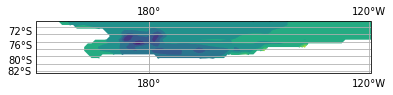

In [75]:
ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0))) 
my_plot = iplt.contourf(fgcube2[0])
plt.gca().gridlines(draw_labels=True)

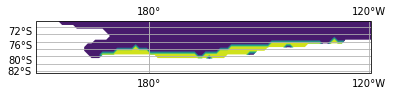

In [76]:
ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0)))
my_plot = iplt.contourf(polynya_location_cube[0])
plt.gca().gridlines(draw_labels=True)

In [77]:
masked_co2_flux = polynya_location_cube * fgcube2[86,:,:]

In [78]:
masked_co2_flux.data[np.logical_not(np.isfinite(masked_co2_flux.data))] = 0

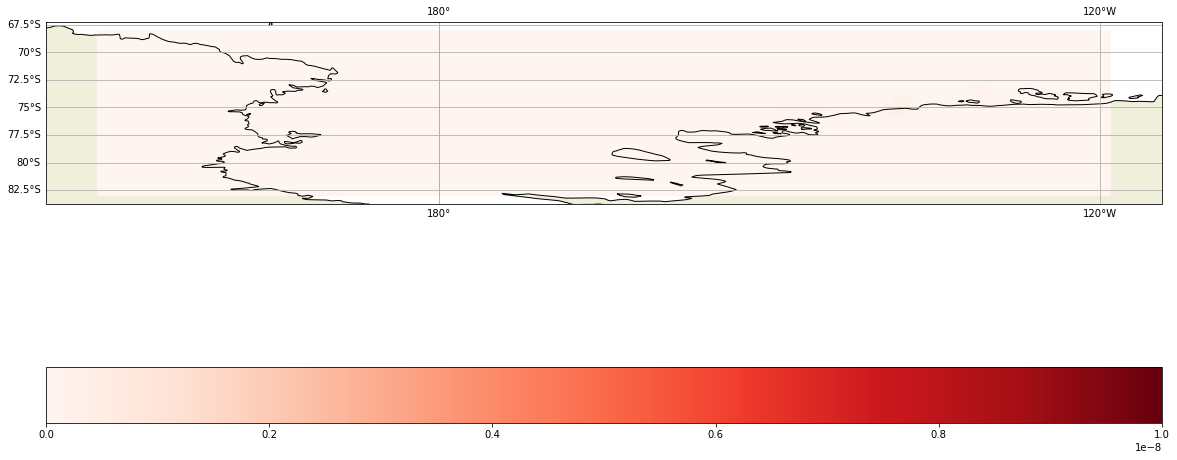

In [79]:
 # adding this so that I can add colour to the land and make sure everything make sense
import cartopy.feature as cfeature # Which time step to plot?

time_slice = 1
plt.figure(figsize=(20,20))
ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0))) # 
#my_plot = iplt.pcolormesh(fgcube2[time_slice],cmap='Reds',vmin=-3.0,vmax=2.0e-8)
#my_plot = iplt.pcolormesh(polynya_location_cube[time_slice],cmap='Reds',vmin=-8.0,vmax=2.0)
my_plot = iplt.pcolormesh(masked_co2_flux[time_slice],cmap='Reds',vmin=0.0,vmax=1.0e-8) 
plt.gca().gridlines(draw_labels=True)
# Adding shading for land and coastline
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.COASTLINE)
# adding a colourbar so I can see what the values are
plt.colorbar(orientation='horizontal')

In [80]:
for i in range (0,2101-2015):
    output = np.nansum(polynya_location_cube_data[i,:,:])
    print(output)
#not sure i have weighted the cubes but kinda assume i dont need to do this?

117.0
92.0
0.0
116.0
91.0
96.0
44.0
130.0
41.0
0.0
0.0
41.0
79.0
74.0
0.0
35.0
55.0
0.0
84.0
49.0
95.0
71.0
0.0
52.0
72.0
86.0
81.0
102.0
0.0
45.0
115.0
39.0
30.0
47.0
71.0
73.0
0.0
0.0
0.0
0.0
0.0
0.0
39.0
69.0
50.0
65.0
0.0
0.0
83.0
0.0
61.0
0.0
0.0
0.0
0.0
62.0
0.0
78.0
83.0
95.0
0.0
0.0
0.0
0.0
60.0
0.0
0.0
26.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
46.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [81]:
def area_avg(cube): 
    try:
        cube.coord('latitude').guess_bounds() 
    except:
        pass 
    try:
        cube.coord('longitude').guess_bounds() 
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'],iris.analysis.MEAN, weights=grid_areas)

In [89]:
masked_co2_flux_timeseries = area_avg(masked_co2_flux*31536000000)

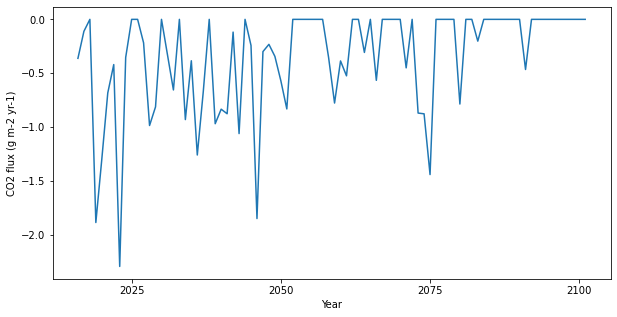

In [93]:
plt.figure(figsize=(10,5)) 
iplt.plot(masked_co2_flux_timeseries) 

plt.ylabel('CO2 flux (g m-2 yr-1)') 
plt.xlabel('Year')
plt.savefig('RSP_carbon_flux')




In [85]:
fgcube

[<iris 'Cube' of Longitude of tracer (T) points / (degrees) (latitude: 180; longitude: 360)>,
<iris 'Cube' of Latitude of tracer (T) points / (degrees) (latitude: 180; longitude: 360)>,
<iris 'Cube' of surface_downward_mass_flux_of_carbon_dioxide_expressed_as_carbon / (kg m-2 s-1) (time: 6000; latitude: 180; longitude: 360)>]

In [94]:
cube2

<iris 'Cube' of sea_ice_area_fraction / (%) (time: 86; latitude: 15; longitude: 92)>